In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as slin

In [2]:
sample_input = np.loadtxt("./data/A5_q5.csv", delimiter=',')

In [3]:
def plot(Y_actual, Y_predicted, title):
    plt.plot(Y_actual, label = 'Y_original')
    plt.plot(Y_predicted, label = 'Y_predicted')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc = 'upper left')
    plt.title(title)
    plt.show()

In [4]:
def percent_error(y_predicted, y_actual):
    error = []
    for x in range(0,len(y_predicted)):
        val = (abs(y_predicted[x] - y_actual[x]) * 100)/y_actual[x]
        error.append(val)
    
    return np.mean(error)

In [5]:
def EWMA(sample_input, alpha, idx):
    
    base_case = 0.0
    for x in range(0, idx):
        base_case += sample_input[idx-x-1]*((1 - alpha)**x)
    
    base_case = alpha * base_case
    
    y_predicted = []
    y_predicted.append(base_case)
    for t in range(idx+1, len(sample_input)):
        y_predicted.append(alpha * sample_input[t-1] + (1 - alpha) * y_predicted[-1])
    
    y_actual = sample_input[idx:]
    error = percent_error(y_predicted, y_actual)
    
    return y_predicted, error

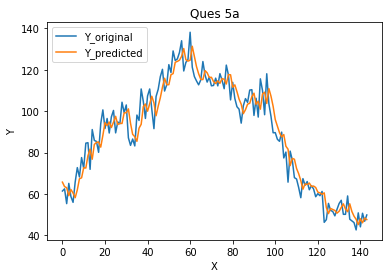

Average Error percent is 6.73759443495


In [6]:
y_predicted, error = EWMA(sample_input, 0.5, 576)
plot(sample_input[576:], y_predicted, 'Ques 5a')
print("Average Error percent is " + str(error))

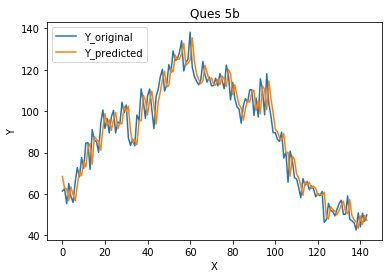

Average Error percent is 6.92667125341


In [7]:
y_predicted, error = EWMA(sample_input, 0.8, 576)
plot(sample_input[576:], y_predicted, 'Ques 5b')
print("Average Error percent is " + str(error))

In [8]:
def ques5c(sample_input):
    y_predicted = []
    for x in range(576,720):
        y_predicted.append(sample_input[x-144])
    
    
    y_actual = sample_input[576:]
    error = percent_error(y_predicted, y_actual)
    return y_predicted,error

Average Error percent is 16.0782035018


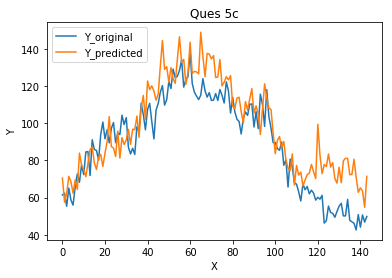

In [9]:
ques5c(sample_input)
y_predicted,error = ques5c(sample_input)
print("Average Error percent is " + str(error))
plot(sample_input[576:], y_predicted, 'Ques 5c')

In [10]:
def partitionData(sample_input, p):
    sample_input_train = []
    for x in range(0, len(sample_input)-p):
        tmp = []
        for i in range(0, p+1):
            tmp.append(sample_input[x+i])
        sample_input_train.append(tmp)
    sample_input_train = np.array(sample_input_train)
        
    X_train = sample_input_train[:,:-1]
    Y_train = sample_input_train[:,-1]
    
    X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
    Y_train = np.reshape(Y_train, (len(Y_train), 1))
    
    return X_train, Y_train

def multiple_lr(X, Y):
    beta = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), Y))

    Y_pred = predict(X, beta)
    
    return Y_pred, beta

def predict(X, beta):
    return np.dot(X, beta)

def ques5d(sample_input, p, n):
    sample_input_X, sample_input_Y = partitionData(sample_input, p)
    Y_actual = sample_input[-n:]
    
    Y_pred = []
    
    for i in range(n,0,-1):
        X_train = sample_input_X[:-i,:]
        Y_train = sample_input_Y[:-i,:]
        
        _, beta = multiple_lr(X_train, Y_train)
        
        X_test = sample_input_X[-i,:]
        y_pred = predict(X_test, beta)
        Y_pred.append(y_pred)

    error = percent_error(Y_pred, Y_actual)
    return Y_pred, error

Average Error percent is 7.5326783364


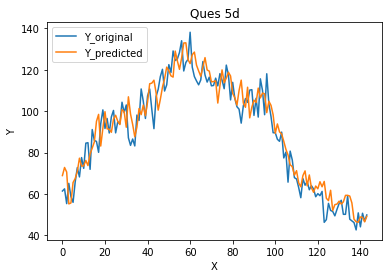

In [11]:
# Question 5d

y_predicted,error = ques5d(sample_input, 144, 144)
print("Average Error percent is " + str(error))
plot(sample_input[576:], y_predicted, 'Ques 5d')

Average Error percent is 57369.7568659


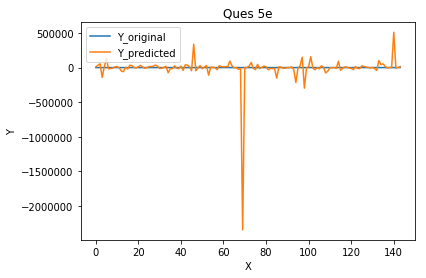

In [25]:
sample_input = np.loadtxt('./data/A5_q5.csv', delimiter=',')

sample_input_train = []
for x in range(0, len(sample_input)-574):
    tmp = []
    for i in range(0, 575):
        tmp.append(sample_input[x+i])
    sample_input_train.append(tmp)
sample_input_train = np.array(sample_input_train)
sample_input_train = np.hstack((np.ones((len(sample_input_train), 1)), sample_input_train))

i = 2
Y_pred = []
while i<146:
    X_train = sample_input_train[0:i,0:575]
    Y_train = sample_input_train[0:i,575]

    _, beta = multiple_lr(X_train, Y_train)

    X_test = sample_input_train[i,0:575]
    y_pred = predict(X_test, beta)
    Y_pred.append(y_pred)
    i = i+1

error = percent_error(Y_pred, sample_input[576:])
print("Average Error percent is " + str(error))
plot(sample_input[576:], Y_pred, 'Ques 5e')

In [15]:
data_prep = []
i = 0
while i<720-574:
    int_list = [1]
    for k in range(575):
        int_list.append(sample_input[i+k])
    data_prep.append(int_list)
    i = i+1
data_prep = np.array(data_prep)

i = 2
preds = []
while i<146:
    X=data_prep[0:i,0:575]
    Y=data_prep[0:i,575]
    beta1 = np.linalg.inv(np.dot(X.T,X))
    beta2 = np.dot(X.T,Y)
    beta = np.dot(beta1,beta2)
    Y_pred = np.dot(data_prep[i,0:575],beta)
    preds.append(Y_pred)
    i = i+1
print(np.mean(np.abs((preds - sample_input[576:])*100/sample_input[576:])))

57369.7568659
